In [1]:
%load_ext autoreload
%autoreload 2

In [190]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path = [".."] + sys.path

In [518]:
import src.optimal_assignment as oa
import src.basic_assignment as ba

## Get distance between zipcodes

In [519]:
observers = ba.get_observer_dataset()
precinct = ba.get_precinct_dataset()
precinct, observers = ba.run_ordered_assignment(precinct, observers)

In [537]:
mask = (precinct["outside_am_legal"] == True) & (
    precinct["outside_am_observer"] != precinct["outside_pm_observer"]
)
precinct_subset = precinct[mask]

In [538]:
precinct_subset

,Pct,Polling Place Name,Address,City,State,Zip,Priority,inside_observer,inside_legal,outside_am_observer,outside_am_legal,outside_pm_observer,outside_pm_legal
5,01-06,CAMERON VILLAGE REGIONAL LIBRARY,1930 CLARK AVE,RALEIGH,NC,27605,6,Nick Byrne,True,Natalie Rice,True,Jesse Shapiro,True
6,01-07,EDENTON STREET UNITED METHODIST CHURCH,301 W. JONES ST,RALEIGH,NC,27603,7,Abigail Foster,True,James Brunson,True,Jennifer Shapiro,True
7,01-07A,SAINT SAVIOUR'S CENTER,616 TUCKER ST,RALEIGH,NC,27603,8,Adam J Goldblatt,True,Joel Schaer,True,Caroline Belk,True
8,01-09,OUR SAVIOR LUTHERAN CHURCH,1500 GLENWOOD AVE,RALEIGH,NC,27608,9,Kelly Perry,True,Sanyam Dinesh Parikh,True,Sean Vitrano,True
9,01-10,WESTMINSTER PRESBYTERIAN CHURCH,301 E WHITAKER MILL RD,RALEIGH,NC,27608,10,Nicola Prall,True,Misty Adams,True,Sarah,True
10,01-11,ROOT ELEMENTARY SCHOOL,3202 NORTHAMPTON ST,RALEIGH,NC,27609,11,Laura Bunte,True,Kelli Ovies,True,Michael Holloway,True
11,01-12,EMMANUEL BAPTIST CHURCH,2100 NOBLE RD,RALEIGH,NC,27608,12,Julia Meder,True,Jonathan,True,Joe Davies,True
12,01-13,ST MATTHEW AME CHURCH,1629 BENNETT ST,RALEIGH,NC,27604,13,James Rogers,True,Forrest (Forey) Read,True,Katie Schaaf,True
13,01-14,OPEN TABLE UNITED METHODIST CHURCH,824 N BLOODWORTH ST,RALEIGH,NC,27604,14,Gigi Gardner,True,Iren Hianik,True,Kyle McEntee,True
14,01-15,DOUGLAS ELEMENTARY SCHOOL,600 ORTEGA RD,RALEIGH,NC,27609,15,David Boaz,True,Hugh Stevens,True,Carol Hazlewood,True


In [539]:
column_to_optimise = "outside_am_observer"

merged_df = precinct_subset.merge(
    observers[["name", "post_code"]], left_on=column_to_optimise, right_on="name"
)
precinct_list = merged_df[["Polling Place Name", "Zip"]]
observer_list = merged_df[[column_to_optimise, "post_code"]]
distance = np.abs(
    precinct_list.Zip.values[np.newaxis, :]
    - observer_list.post_code.values[:, np.newaxis]
)
distance_df = pd.DataFrame(
    distance,
    index=observer_list[column_to_optimise],
    columns=precinct_list["Polling Place Name"],
)

merged_df["current_distance"] = np.abs(merged_df["Zip"] - merged_df["post_code"])

In [540]:
merged_df

,Pct,Polling Place Name,Address,City,State,Zip,Priority,inside_observer,inside_legal,outside_am_observer,outside_am_legal,outside_pm_observer,outside_pm_legal,name,post_code,current_distance
0,01-06,CAMERON VILLAGE REGIONAL LIBRARY,1930 CLARK AVE,RALEIGH,NC,27605,6,Nick Byrne,True,Natalie Rice,True,Jesse Shapiro,True,Natalie Rice,27608,3
1,01-07,EDENTON STREET UNITED METHODIST CHURCH,301 W. JONES ST,RALEIGH,NC,27603,7,Abigail Foster,True,James Brunson,True,Jennifer Shapiro,True,James Brunson,27612,9
2,01-07A,SAINT SAVIOUR'S CENTER,616 TUCKER ST,RALEIGH,NC,27603,8,Adam J Goldblatt,True,Joel Schaer,True,Caroline Belk,True,Joel Schaer,27615,12
3,01-09,OUR SAVIOR LUTHERAN CHURCH,1500 GLENWOOD AVE,RALEIGH,NC,27608,9,Kelly Perry,True,Sanyam Dinesh Parikh,True,Sean Vitrano,True,Sanyam Dinesh Parikh,27609,1
4,01-10,WESTMINSTER PRESBYTERIAN CHURCH,301 E WHITAKER MILL RD,RALEIGH,NC,27608,10,Nicola Prall,True,Misty Adams,True,Sarah,True,Misty Adams,27539,69
5,01-11,ROOT ELEMENTARY SCHOOL,3202 NORTHAMPTON ST,RALEIGH,NC,27609,11,Laura Bunte,True,Kelli Ovies,True,Michael Holloway,True,Kelli Ovies,27609,0
6,01-12,EMMANUEL BAPTIST CHURCH,2100 NOBLE RD,RALEIGH,NC,27608,12,Julia Meder,True,Jonathan,True,Joe Davies,True,Jonathan,27560,48
7,01-13,ST MATTHEW AME CHURCH,1629 BENNETT ST,RALEIGH,NC,27604,13,James Rogers,True,Forrest (Forey) Read,True,Katie Schaaf,True,Forrest (Forey) Read,27609,5
8,01-14,OPEN TABLE UNITED METHODIST CHURCH,824 N BLOODWORTH ST,RALEIGH,NC,27604,14,Gigi Gardner,True,Iren Hianik,True,Kyle McEntee,True,Iren Hianik,27609,5
9,01-15,DOUGLAS ELEMENTARY SCHOOL,600 ORTEGA RD,RALEIGH,NC,27609,15,David Boaz,True,Hugh Stevens,True,Carol Hazlewood,True,Hugh Stevens,27608,1


In [543]:
distance_df

Polling Place Name,CAMERON VILLAGE REGIONAL LIBRARY,EDENTON STREET UNITED METHODIST CHURCH,SAINT SAVIOUR'S CENTER,OUR SAVIOR LUTHERAN CHURCH,WESTMINSTER PRESBYTERIAN CHURCH,ROOT ELEMENTARY SCHOOL,EMMANUEL BAPTIST CHURCH,ST MATTHEW AME CHURCH,OPEN TABLE UNITED METHODIST CHURCH,DOUGLAS ELEMENTARY SCHOOL,GLEN EDEN PILOT PARK COMM CNTR,ST MARK'S UNITED METHODIST CHURCH,EASTGATE PARK COMMUNITY CENTER
outside_am_observer,,,,,,,,,,,,,
Natalie Rice,3,5,5,0,0,1,0,4,4,1,4,1,1
James Brunson,7,9,9,4,4,3,4,8,8,3,0,3,3
Joel Schaer,10,12,12,7,7,6,7,11,11,6,3,6,6
Sanyam Dinesh Parikh,4,6,6,1,1,0,1,5,5,0,3,0,0
Misty Adams,66,64,64,69,69,70,69,65,65,70,73,70,70
Kelli Ovies,4,6,6,1,1,0,1,5,5,0,3,0,0
Jonathan,45,43,43,48,48,49,48,44,44,49,52,49,49
Forrest (Forey) Read,4,6,6,1,1,0,1,5,5,0,3,0,0
Iren Hianik,4,6,6,1,1,0,1,5,5,0,3,0,0


In [548]:
matched_set = oa.get_matched_sets(distance_df, merged_df, column_to_optimise, verbose=True)

 >>>>>>  13
Self:  ['Kelli Ovies', 'James A. Brunson ']
 >>>>>>  11
Cycle :  Hugh Stevens
Cycle :  Sanyam Dinesh Parikh
 >>>>>>  9
Cycle :  James Brunson 
Cycle :  Melissa Walker
 >>>>>>  7
Cycle :  Joel Schaer
Cycle :  Eddie Speas
Cycle :  Misty Adams
 >>>>>>  4
Cycle :  Jonathan
Cycle :  Forrest (Forey) Read
 >>>>>>  2
Self:  ['Natalie Rice']
 >>>>>>  1
Self:  ['Iren Hianik']


In [554]:
df = pd.DataFrame([matched_set], index=["pollingstation"]).T.reset_index()
df.columns = [column_to_optimise, "pollingstation"]
out = precinct[["Pct", "Polling Place Name"]].merge(
    df, left_on="Polling Place Name", right_on="pollingstation"
).drop("pollingstation", axis=1)

In [563]:
out['outside_am_observer'].values

array(['Natalie Rice', 'Melissa Walker', 'Misty Adams', 'Hugh Stevens',
       'Eddie Speas', 'Kelli Ovies', 'Forrest (Forey) Read', 'Jonathan',
       'Iren Hianik', 'Sanyam Dinesh Parikh', 'James A. Brunson ',
       'James Brunson ', 'Joel Schaer'], dtype=object)

In [564]:
precinct.loc[mask, "outside_am_observer"] = out['outside_am_observer'].values
precinct.loc[mask, "outside_am_observer"]

5             Natalie Rice
6           Melissa Walker
7              Misty Adams
8             Hugh Stevens
9              Eddie Speas
10             Kelli Ovies
11    Forrest (Forey) Read
12                Jonathan
13             Iren Hianik
14    Sanyam Dinesh Parikh
15       James A. Brunson 
16          James Brunson 
17             Joel Schaer
Name: outside_am_observer, dtype: object

# Top-trading cycle

In [487]:
precinct_inside_legal = precinct[precinct['inside_legal'] == True]
precinct_inside_legal

,Pct,Polling Place Name,Address,City,State,Zip,Priority,inside_observer,inside_legal,outside_am_observer,outside_am_legal,outside_pm_observer,outside_pm_legal
0,01-01,BROOKS AVENUE CHURCH OF CHRIST,700 BROOKS AVE,RALEIGH,NC,27607,1,Kelly Furr,True,Meeghan Ramsey,True,Meeghan Ramsey,True
1,01-02,UNITARIAN UNIVERSALIST FELLOWSHIP OF RALEIGH,3313 WADE AVE,RALEIGH,NC,27607,2,Mike Davis,True,Sa'Metria Jones,True,Sa'Metria Jones,True
2,01-03,ST JOHNS BAPTIST CHURCH,1615 OBERLIN RD,RALEIGH,NC,27608,3,John P Manzo,True,Joseph D Ableidinger,True,Joseph D Ableidinger,True
3,01-04,DANIELS MIDDLE SCHOOL,2816 OBERLIN RD,RALEIGH,NC,27608,4,Michelle Barrett,True,Harry Johnson,True,Harry Johnson,True
4,01-05,WHITE MEMORIAL PRESBYTERIAN CHURCH,2010 MCDONALD LN,RALEIGH,NC,27608,5,Nam Douglass,True,Susan J Vanderweert,True,Susan J Vanderweert,True
5,01-06,CAMERON VILLAGE REGIONAL LIBRARY,1930 CLARK AVE,RALEIGH,NC,27605,6,Nick Byrne,True,Natalie Rice,True,Jesse Shapiro,True
6,01-07,EDENTON STREET UNITED METHODIST CHURCH,301 W. JONES ST,RALEIGH,NC,27603,7,Abigail Foster,True,James Brunson,True,Jennifer Shapiro,True
7,01-07A,SAINT SAVIOUR'S CENTER,616 TUCKER ST,RALEIGH,NC,27603,8,Adam J Goldblatt,True,Joel Schaer,True,Caroline Belk,True
8,01-09,OUR SAVIOR LUTHERAN CHURCH,1500 GLENWOOD AVE,RALEIGH,NC,27608,9,Kelly Perry,True,Sanyam Dinesh Parikh,True,Sean Vitrano,True
9,01-10,WESTMINSTER PRESBYTERIAN CHURCH,301 E WHITAKER MILL RD,RALEIGH,NC,27608,10,Nicola Prall,True,Misty Adams,True,Sarah,True


In [480]:
merged_df = precinct_inside_legal.merge(observers[['name', 'post_code']], left_on = 'inside_observer', right_on = 'name')

In [566]:
merged_df

,Pct,Polling Place Name,Address,City,State,Zip,Priority,inside_observer,inside_legal,outside_am_observer,outside_am_legal,outside_pm_observer,outside_pm_legal,name,post_code,current_distance
0,01-06,CAMERON VILLAGE REGIONAL LIBRARY,1930 CLARK AVE,RALEIGH,NC,27605,6,Nick Byrne,True,Natalie Rice,True,Jesse Shapiro,True,Natalie Rice,27608,3
1,01-07,EDENTON STREET UNITED METHODIST CHURCH,301 W. JONES ST,RALEIGH,NC,27603,7,Abigail Foster,True,James Brunson,True,Jennifer Shapiro,True,James Brunson,27612,9
2,01-07A,SAINT SAVIOUR'S CENTER,616 TUCKER ST,RALEIGH,NC,27603,8,Adam J Goldblatt,True,Joel Schaer,True,Caroline Belk,True,Joel Schaer,27615,12
3,01-09,OUR SAVIOR LUTHERAN CHURCH,1500 GLENWOOD AVE,RALEIGH,NC,27608,9,Kelly Perry,True,Sanyam Dinesh Parikh,True,Sean Vitrano,True,Sanyam Dinesh Parikh,27609,1
4,01-10,WESTMINSTER PRESBYTERIAN CHURCH,301 E WHITAKER MILL RD,RALEIGH,NC,27608,10,Nicola Prall,True,Misty Adams,True,Sarah,True,Misty Adams,27539,69
5,01-11,ROOT ELEMENTARY SCHOOL,3202 NORTHAMPTON ST,RALEIGH,NC,27609,11,Laura Bunte,True,Kelli Ovies,True,Michael Holloway,True,Kelli Ovies,27609,0
6,01-12,EMMANUEL BAPTIST CHURCH,2100 NOBLE RD,RALEIGH,NC,27608,12,Julia Meder,True,Jonathan,True,Joe Davies,True,Jonathan,27560,48
7,01-13,ST MATTHEW AME CHURCH,1629 BENNETT ST,RALEIGH,NC,27604,13,James Rogers,True,Forrest (Forey) Read,True,Katie Schaaf,True,Forrest (Forey) Read,27609,5
8,01-14,OPEN TABLE UNITED METHODIST CHURCH,824 N BLOODWORTH ST,RALEIGH,NC,27604,14,Gigi Gardner,True,Iren Hianik,True,Kyle McEntee,True,Iren Hianik,27609,5
9,01-15,DOUGLAS ELEMENTARY SCHOOL,600 ORTEGA RD,RALEIGH,NC,27609,15,David Boaz,True,Hugh Stevens,True,Carol Hazlewood,True,Hugh Stevens,27608,1


In [481]:
precinct_list = merged_df[['Polling Place Name', 'Zip']]
observer_list = merged_df[['inside_observer', 'post_code']]

In [482]:
distance = np.abs(precinct_list.Zip.values[np.newaxis, :] - observer_list.post_code.values[:, np.newaxis])
distance_df = pd.DataFrame(distance, index = observer_list.inside_observer, columns=precinct_list['Polling Place Name'])

In [565]:
distance_df

Polling Place Name,CAMERON VILLAGE REGIONAL LIBRARY,EDENTON STREET UNITED METHODIST CHURCH,SAINT SAVIOUR'S CENTER,OUR SAVIOR LUTHERAN CHURCH,WESTMINSTER PRESBYTERIAN CHURCH,ROOT ELEMENTARY SCHOOL,EMMANUEL BAPTIST CHURCH,ST MATTHEW AME CHURCH,OPEN TABLE UNITED METHODIST CHURCH,DOUGLAS ELEMENTARY SCHOOL,GLEN EDEN PILOT PARK COMM CNTR,ST MARK'S UNITED METHODIST CHURCH,EASTGATE PARK COMMUNITY CENTER
outside_am_observer,,,,,,,,,,,,,
Natalie Rice,3,5,5,0,0,1,0,4,4,1,4,1,1
James Brunson,7,9,9,4,4,3,4,8,8,3,0,3,3
Joel Schaer,10,12,12,7,7,6,7,11,11,6,3,6,6
Sanyam Dinesh Parikh,4,6,6,1,1,0,1,5,5,0,3,0,0
Misty Adams,66,64,64,69,69,70,69,65,65,70,73,70,70
Kelli Ovies,4,6,6,1,1,0,1,5,5,0,3,0,0
Jonathan,45,43,43,48,48,49,48,44,44,49,52,49,49
Forrest (Forey) Read,4,6,6,1,1,0,1,5,5,0,3,0,0
Iren Hianik,4,6,6,1,1,0,1,5,5,0,3,0,0


In [483]:
merged_df['current_distance'] = np.abs(merged_df['Zip'] - merged_df['post_code'])

In [484]:
def resolve_cycle(pref_network):
    
    G_proj = pref_network.get_projection()
    adj_df = pref_network.get_projection_adj()
    
    # find self cycles
    self_mask = (adj_df['to'].apply(len) == 0)
    preferences = {}
    if self_mask.any():
        observers_matched = adj_df.loc[self_mask, 'from']
        print("Self: ", list(observers_matched))
        preferences.update(dict(pref_network.G.out_edges(list(observers_matched))))

    try:
        for observer, _ in nx.find_cycle(G_proj):
            print("Cycle : ", observer)
            preferences.update(dict(pref_network.G.out_edges([observer])))
    except nx.NetworkXNoCycle:
        pass
    
    return preferences
    

In [485]:
matched_set = {}
i = 0
while len(distance_df) > 0:
    print(" >>>>>> ", i)
    preference = np.argmax(distance_df.values, axis = 1)
    preference_edges = pd.DataFrame({'observer': distance_df.index, 
                                    'preference': distance_df.columns[preference]})
    ownership_edges = merged_df.loc[merged_df['Polling Place Name'].isin(distance_df.columns[preference]), 
                                    ['Polling Place Name', 'inside_observer']]
    
    PN = PreferenceNetwork(preference_edges, ownership_edges)
    #PN.draw()
    adj_df = PN.get_projection_adj()
    
    matched_pairs = resolve_cycle(PN)
    matched_set.update(matched_pairs)
    
    distance_df = distance_df.drop(matched_pairs.keys())
    distance_df = distance_df.drop(matched_pairs.values(), axis= 1)
    
    i += 1

 >>>>>>  9
Self:  ['Jennifer Van Doren']
 >>>>>>  9
Self:  ['Martha J Svoboda']
 >>>>>>  9
Cycle :  Rohith Chari
Cycle :  Ben Spiker
 >>>>>>  9
Self:  ['Margaret Avery', 'Amanda S Roberson']
 >>>>>>  9
Self:  ['Abigail Foster']
 >>>>>>  9
Self:  ['Adam J Goldblatt']
 >>>>>>  9
Cycle :  Melinda Burrows
Cycle :  Suzanne Little
 >>>>>>  9
Self:  ['Julia Dixon']
 >>>>>>  9
Cycle :  James Rogers
Cycle :  Maire
 >>>>>>  9
Cycle :  Gigi Gardner
Cycle :  Sarah Ford
 >>>>>>  9
Cycle :  Jeff Langenderfer
Cycle :  Pamela Hobson
 >>>>>>  9
Cycle :  Elizabeth Johnson
Cycle :  Bruce Hamilton
 >>>>>>  9
Cycle :  Nick Byrne
Cycle :  Robert Sparks
 >>>>>>  9
Self:  ['Christy Agner']
 >>>>>>  9
Cycle :  Laura Bunte
Cycle :  Ross Drath
 >>>>>>  9
Self:  ['Kunal choksi']
 >>>>>>  9
Cycle :  David Boaz
Cycle :  Steven J Vining
 >>>>>>  9
Self:  ['Adrian Raley']
 >>>>>>  9
Cycle :  Suzanne Ladd
Cycle :  Jennifer Weiss
 >>>>>>  9
Cycle :  Kelly Furr
Cycle :  James K Shropshire
 >>>>>>  9
Self:  ['Kurt Olson'

In [514]:
df = pd.DataFrame([matched_set], index = ['pollingstation']).T.reset_index()
df.columns = ['inside_observer', 'pollingstation']
precinct_inside_legal[['Pct', 'Polling Place Name']].merge(df, left_on = 'Polling Place Name', right_on = 'pollingstation').drop('pollingstation', axis=1)

,Pct,Polling Place Name,inside_observer
0,01-01,BROOKS AVENUE CHURCH OF CHRIST,James K Shropshire
1,01-02,UNITARIAN UNIVERSALIST FELLOWSHIP OF RALEIGH,Karl Knudsen
2,01-03,ST JOHNS BAPTIST CHURCH,Jonathan Short
3,01-04,DANIELS MIDDLE SCHOOL,Michelle Barrett
4,01-05,WHITE MEMORIAL PRESBYTERIAN CHURCH,Nam Douglass
5,01-06,CAMERON VILLAGE REGIONAL LIBRARY,Robert Sparks
6,01-07,EDENTON STREET UNITED METHODIST CHURCH,Abigail Foster
7,01-07A,SAINT SAVIOUR'S CENTER,Adam J Goldblatt
8,01-09,OUR SAVIOR LUTHERAN CHURCH,Kelly Perry
9,01-10,WESTMINSTER PRESBYTERIAN CHURCH,Nicola Prall


In [486]:
matched_set

{'Jennifer Van Doren': 'MILLBROOK EXCHANGE PARK COMMUNITY CENTER',
 'Martha J Svoboda': 'CHRIST BAPTIST CHURCH',
 'Rohith Chari': 'MOUNT VERNON BAPTIST CHURCH',
 'Ben Spiker': 'WALNUT TERRACE',
 'Margaret Avery': 'GLEN EDEN PILOT PARK COMM CNTR',
 'Amanda S Roberson': 'CHAVIS COMMUNITY CENTER',
 'Abigail Foster': 'EDENTON STREET UNITED METHODIST CHURCH',
 'Adam J Goldblatt': "SAINT SAVIOUR'S CENTER",
 'Melinda Burrows': 'CAROLINA PINES COMMUNITY CENTER',
 'Suzanne Little': 'POE INTERNATIONAL MONTESSORI SCHOOL',
 'Julia Dixon': 'PROJECT ENLIGHTENMENT',
 'James Rogers': 'ROBERTS PARK COMMUNITY CENTER',
 'Maire': 'ST MATTHEW AME CHURCH',
 'Gigi Gardner': 'SOUTHEAST RALEIGH MAGNET HIGH SCHOOL',
 'Sarah Ford': 'OPEN TABLE UNITED METHODIST CHURCH',
 'Jeff Langenderfer': 'BRENTWOOD ELEMENTARY SCHOOL',
 'Pamela Hobson': 'POWELL ELEMENTARY SCHOOL',
 'Elizabeth Johnson': 'GREEN ROAD PARK COMMUNITY CENTER',
 'Bruce Hamilton': 'TARBORO ROAD COMMUNITY CENTER',
 'Nick Byrne': 'CARNAGE MIDDLE SCHOOL'

In [83]:
preference = np.argmax(distance_df.values, axis = 1)
preference_edges = pd.DataFrame({'observer': distance_df2.index, 
                                'preference': distance_df2.columns[preference]})
ownership_edges = merged_df.loc[merged_df['Polling Place Name'].isin(distance_df2.columns[preference]), 
                                ['Polling Place Name', 'inside_observer']]

798

In [126]:
preference = np.argmax(distance, axis = 1)
preference_edges = pd.DataFrame({'observer': merged_df['inside_observer'], 
                                'preference': merged_df['Polling Place Name'].iloc[preference].reset_index(drop = True)})
ownership_edges = merged_df[['Polling Place Name', 'inside_observer']]

## Create a bi-partite network

In [362]:
class PreferenceNetwork():
    
    def __init__(self, preference_edges, ownership_edges):
        
        G = nx.DiGraph()
        
        for node in ownership_edges['Polling Place Name']:
            G.add_node(node, node_type = 'pollstation', node_color='darkred')
        for node in ownership_edges['inside_observer']:
            G.add_node(node, node_type = 'observer', node_color='dodgerblue')
        for node in preference_edges['preference']:
            G.add_node(node, node_type = 'pollstation', node_color='darkred')
        for node in preference_edges['observer']:
            G.add_node(node, node_type = 'observer', node_color='dodgerblue')
            
        G.add_edges_from(ownership_edges.itertuples(index=False, name = None))
        G.add_edges_from(preference_edges.itertuples(index=False, name = None))

        self.G = G
    
    def draw(self):
        
        f, ax = plt.subplots(figsize=(10, 7))

        pos = nx.spring_layout(self.G )
        ec = nx.draw_networkx_edges(self.G , pos, alpha=0.2)
        nd = nx.draw_networkx_nodes(self.G , pos, node_color=nx.get_node_attributes(self.G, 'node_color').values(), node_size = 50)
        
        return f
    
    def get_projection(self, node_type = 'observer'):
        
        obs_nodes = [x for x,y in self.G .nodes(data=True) if y['node_type']==node_type]
        G_proj = nx.bipartite.projected_graph(self.G, obs_nodes)
        
        return G_proj
    
    def get_projection_adj(self, node_type ='observer'):
        
        G_proj = self.get_projection(node_type)
        adjacency_matrix = pd.DataFrame(G_proj.adjacency(), columns = ['from', 'to'])
        adjacency_matrix['to'] = adjacency_matrix['to'].apply(lambda x: list(x.keys()))
        
        return adjacency_matrix

In [226]:
G = nx.DiGraph()

In [228]:
G.add_edges_from(ownership_edges.itertuples(index=False, name = None))
G.add_edges_from(preference_edges.itertuples(index=False, name = None))

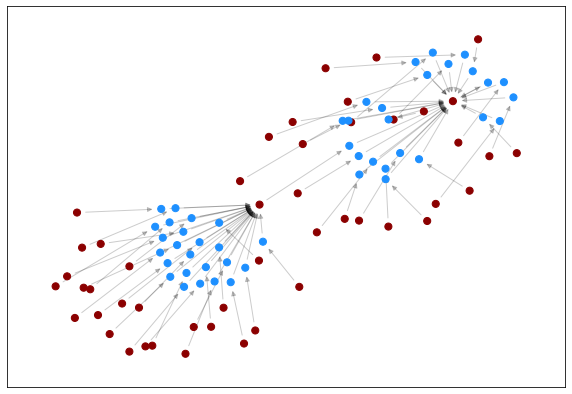

In [232]:
f, ax = plt.subplots(figsize=(10, 7))

pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nd = nx.draw_networkx_nodes(G, pos, node_color=nx.get_node_attributes(G, 'node_color').values(), node_size = 50)
#ax.legend([nd])

In [237]:
nodesAt5 = [x for x,y in G.nodes(data=True) if y['node_type']=='observer']

In [240]:
G_proj = nx.bipartite.projected_graph(G, nodesAt5)

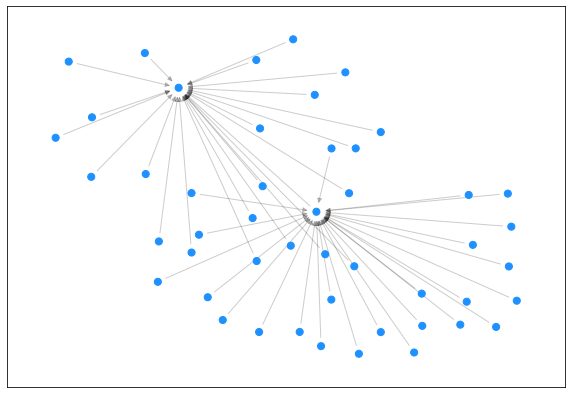

In [242]:
f, ax = plt.subplots(figsize=(10, 7))

pos = nx.spring_layout(G_proj)
ec = nx.draw_networkx_edges(G_proj, pos, alpha=0.2)
nd = nx.draw_networkx_nodes(G_proj, pos, node_color=nx.get_node_attributes(G_proj, 'node_color').values(), node_size = 50)

In [282]:
adjacency_matrix = pd.DataFrame(G_proj.adjacency(), columns = ['from', 'to'])
adjacency_matrix['to'] = adjacency_matrix['to'].apply(lambda x: list(x.keys()))

In [283]:
adjacency_matrix

,from,to
0,Michelle Barrett,[Anne Nicholson Hogewood]
1,Kelly Furr,[Anne Nicholson Hogewood]
2,Mike Davis,[Anne Nicholson Hogewood]
3,John P Manzo,[Julia Dixon]
4,Nick Byrne,[Anne Nicholson Hogewood]
5,Nam Douglass,[Julia Dixon]
6,Kelly Perry,[Anne Nicholson Hogewood]
7,Adam J Goldblatt,[Julia Dixon]
8,James Rogers,[Anne Nicholson Hogewood]
9,Nicola Prall,[Julia Dixon]


In [308]:
obs_to_drop = 'Julia Dixon'
polls_to_drop = ownership_edges.loc[ownership_edges.inside_observer == obs_to_drop, 'Polling Place Name'].values[0]

In [309]:
polls_to_drop

'WALNUT TERRACE'

In [312]:
distance_df2 = distance_df.drop('Julia Dixon')
distance_df2 = distance_df2.drop(polls_to_drop, axis= 1)

In [325]:
merged_df = merged_df[merged_df.inside_observer != obs_to_drop]

In [332]:
distance_df2.columns[preference]

Index(['MILLBROOK EXCHANGE PARK COMMUNITY CENTER',
       'MILLBROOK EXCHANGE PARK COMMUNITY CENTER',
       'MILLBROOK EXCHANGE PARK COMMUNITY CENTER', 'CHAVIS COMMUNITY CENTER',
       'MILLBROOK EXCHANGE PARK COMMUNITY CENTER', 'CHAVIS COMMUNITY CENTER',
       'MILLBROOK EXCHANGE PARK COMMUNITY CENTER', 'CHAVIS COMMUNITY CENTER',
       'MILLBROOK EXCHANGE PARK COMMUNITY CENTER', 'CHAVIS COMMUNITY CENTER',
       'CHAVIS COMMUNITY CENTER', 'CHAVIS COMMUNITY CENTER',
       'MILLBROOK EXCHANGE PARK COMMUNITY CENTER',
       'MILLBROOK EXCHANGE PARK COMMUNITY CENTER', 'CHAVIS COMMUNITY CENTER',
       'CHAVIS COMMUNITY CENTER', 'CHAVIS COMMUNITY CENTER',
       'CHAVIS COMMUNITY CENTER', 'MILLBROOK EXCHANGE PARK COMMUNITY CENTER',
       'CHAVIS COMMUNITY CENTER', 'MILLBROOK EXCHANGE PARK COMMUNITY CENTER',
       'MILLBROOK EXCHANGE PARK COMMUNITY CENTER', 'CHAVIS COMMUNITY CENTER',
       'CHAVIS COMMUNITY CENTER', 'MILLBROOK EXCHANGE PARK COMMUNITY CENTER',
       'MILLBROOK EXCHA

In [333]:
preference = np.argmax(distance_df2.values, axis = 1)
preference_edges = pd.DataFrame({'observer': distance_df2.index, 
                                'preference': distance_df2.columns[preference]})
ownership_edges = merged_df.loc[merged_df['Polling Place Name'].isin(distance_df2.columns[preference]), 
                                ['Polling Place Name', 'inside_observer']]

In [337]:
ownership_edges

,Polling Place Name,inside_observer
24,CHAVIS COMMUNITY CENTER,Jeff Langenderfer
40,MILLBROOK EXCHANGE PARK COMMUNITY CENTER,Anne Nicholson Hogewood


In [345]:
PN = PreferenceNetwork(preference_edges, ownership_edges)

In [350]:
G_proj = PN.get_projection()
adjacency_matrix = pd.DataFrame(G_proj.adjacency(), columns = ['from', 'to'])
adjacency_matrix['to'] = adjacency_matrix['to'].apply(lambda x: list(x.keys()))

adjacency_matrix

,from,to
0,Jeff Langenderfer,[]
1,Anne Nicholson Hogewood,[Jeff Langenderfer]
2,Michelle Barrett,[Anne Nicholson Hogewood]
3,Kelly Furr,[Anne Nicholson Hogewood]
4,Mike Davis,[Anne Nicholson Hogewood]
5,John P Manzo,[Jeff Langenderfer]
6,Nick Byrne,[Anne Nicholson Hogewood]
7,Nam Douglass,[Jeff Langenderfer]
8,Kelly Perry,[Anne Nicholson Hogewood]
9,Adam J Goldblatt,[Jeff Langenderfer]


In [357]:
observer_matched = adjacency_matrix.loc[adjacency_matrix['to'].apply(len) == 0, 'from'][0]
preference_matched = preference_edges.loc[preference_edges.observer == observer_matched, 'preference']


'Jeff Langenderfer'